# Regresión lineal simple

El conjunto de datos contiene información sobre las condiciones meteorológicas registradas cada día en varias estaciones meteorológicas de todo el mundo. La información incluye precipitaciones, nevadas, temperaturas, velocidad del viento y si el día incluyó tormentas eléctricas u otras malas condiciones meteorológicas.

Así que nuestra tarea es predecir la temperatura máxima tomando como entrada la temperatura mínima.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('Weather.csv')

C:\Users\Moni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(119040, 31)

In [5]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


#### Vista estadística del dataset

Graficaremos nuestros puntos de datos en un diagrama en dos dimensiones para ilustrar nuestro dataset y ver si manualmente podemos encontrar alguna relación entre los datos usando el siguiente código:

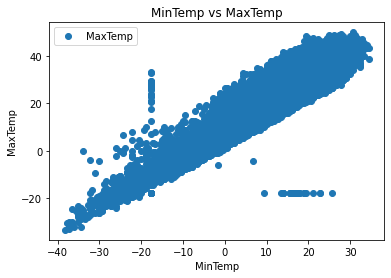

In [6]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o') 
plt.title('MinTemp vs MaxTemp') 
plt.xlabel('MinTemp') 
plt.ylabel('MaxTemp') 
plt.show()

Hemos tomado “MinTemp” y “MaxTemp” para hacer nuestro análisis. Arriba hay un gráfico en 2 dimensiones entre MinTemp y MaxTemp. Vamos a chequear la temperatura promedio máxima y una vez la ploteamos podemos observar que la temperatura promedio máxima está entre cerca de 25 y 35

<Figure size 1080x720 with 0 Axes>

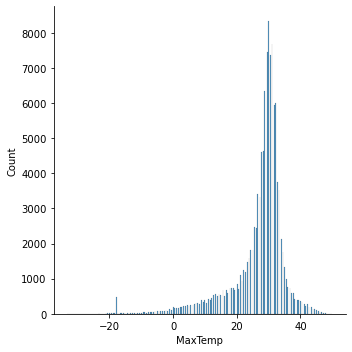

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(dataset['MaxTemp'])

Temperatura promedio máxima la cual está entre 25 y 35
 
Nuestro siguiente paso es dividir nuestros datos en “atributos” y “etiquetas”.
Los atributos son las variables independientes,  mientras que las etiquetas son las variables dependientes cuyos valores se deben predecir. En nuestro conjunto de datos, sólo tenemos dos columnas. Queremos predecir el “MaxTemp” dependiendo del MinTemp registrado. Por lo tanto, nuestro conjunto de atributos consistirá en la columna "MinTemp" que se almacena en la variable X, y la etiqueta será la columna "MaxTemp" que se almacena en la variable y.

In [8]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

A continuación, dividimos el 80% de los datos al conjunto de entrenamiento mientras que el 20% de los datos al conjunto de pruebas usando el código de abajo. La variable test_size es nos permite definir  la proporción del conjunto de pruebas.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Después de dividir los datos en conjuntos de entrenamiento y pruebas, finalmente, es el momento de entrenar nuestro algoritmo. Para ello, necesitamos importar la clase LinearRegression, instanciarla y llamar el método fit() junto con nuestros datos de entrenamiento.

In [10]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

Como hemos discutido, el modelo de regresión lineal básicamente encuentra el mejor valor para la intercepción y la pendiente, lo que resulta en la línea que mejor se ajusta a los datos. Para ver el valor de la intercepción y la pendiente calculado por el algoritmo de regresión lineal para nuestro conjunto de datos.

In [12]:
#Para obtener el interceptor:
print(regressor.intercept_)
#Para obtener la pendiente
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


El resultado debe ser aproximadamente 10.66185201 y 0.92033997 respectivamente. Esto significa que por cada unidad de cambio en la temperatura mínima, el cambio en la temperatura máxima es de alrededor de 0,92%. Ahora que hemos entrenado nuestro algoritmo, es hora de hacer algunas predicciones. Para ello, utilizaremos los datos de nuestras pruebas y veremos con qué precisión nuestro algoritmo predice la puntuación porcentual. 

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


Comparación del valor real y el predecido 

También podemos visualizar el resultado de la comparación como un gráfico de barras usando el siguiente código. Como el número de registros es enorme, para fines de representación vamos a tomar 25 registros.

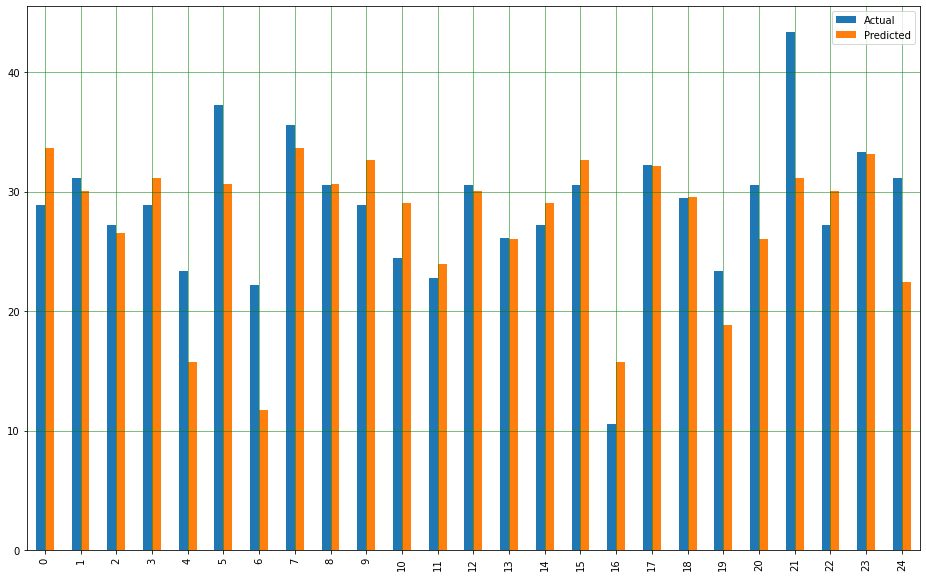

In [16]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Gráfico de barras mostrando la comparación de valores reales y predecidos 

Aunque nuestro modelo no es muy preciso, los porcentajes predichos se acercan a los reales.
Vamos a trazar nuestra línea recta con los datos de la prueba:

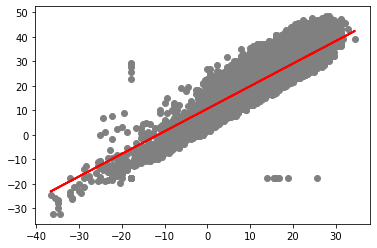

In [17]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Predicción vs datos de prueba

La línea recta del gráfico anterior muestra que nuestro algoritmo es correcto. El paso final es evaluar el desempeño del algoritmo. Este paso es especialmente importante para comparar el rendimiento de los diferentes algoritmos en un determinado dataset.  Para los algoritmos de regresión, se utilizan comúnmente tres métricas de evaluación:

In [18]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 3.19932917837853
Error Cuadratico Medio: 17.631568097568447
Raíz del error cuadrático medio: 4.198996082109204


Se puede ver que el valor Raíz del error cuadrático medio 4,19, lo cual es más del 10% del valor medio de los porcentajes de toda la temperatura, es decir, 22,41. Esto significa que nuestro algoritmo no fue muy preciso pero aún así puede hacer predicciones razonablemente buenas.